In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
data = pd.read_csv("/content/drive/MyDrive/load_data.csv")

# **Exploratory Data Analysis (EDA)**

In [3]:
data.head()

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type
0,01-01-2018 00:15,8.753692,2.95,0.0,0.0,73.210000,100.0,900.000000,Light_Load
1,01-01-2018 00:30,4.000000,4.46,0.0,0.0,66.770000,100.0,1800.000000,Light_Load
2,01-01-2018 00:45,3.240000,3.28,0.0,0.0,70.280000,100.0,8070.880991,Light_Load
3,01-01-2018 01:00,3.310000,3.56,0.0,0.0,68.090000,100.0,3600.000000,Light_Load
4,01-01-2018 01:15,3.820000,4.50,0.0,0.0,133.655666,NaN,4500.000000,Light_Load


In [4]:
data.dtypes

Date_Time                                object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                     float64
Load_Type                                object
dtype: object

In [5]:
data.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,33482.000000,34165.000000,33885.000000,34586.000000,34691.000000,33570.000000,34586.000000
mean,30.873061,14.704573,4.386097,0.012947,90.740871,94.926552,48013.664032
std,41.415015,20.342721,9.090181,0.019726,39.745395,49.826872,34046.492333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.310000,2.340000,0.000000,0.000000,66.295000,99.800000,22500.000000
50%,5.290000,5.180000,0.000000,0.000000,90.080000,100.000000,45000.000000
75%,53.560000,23.510000,2.298558,0.020000,100.000000,100.000000,68400.000000
max,435.019069,262.630718,78.809000,0.188166,299.996814,299.969494,248821.810465


In [6]:
data["Load_Type"].value_counts()

Light_Load      18073
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64

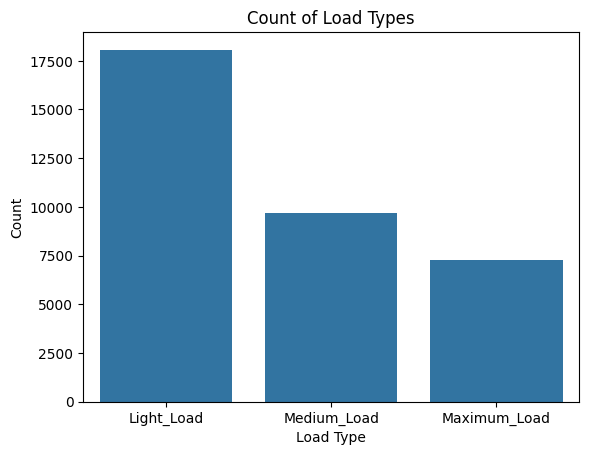

In [7]:
# Bar plot for categorical features
sns.countplot(x='Load_Type', data=data)
plt.title('Count of Load Types')
plt.xlabel('Load Type')
plt.ylabel('Count')
plt.show()

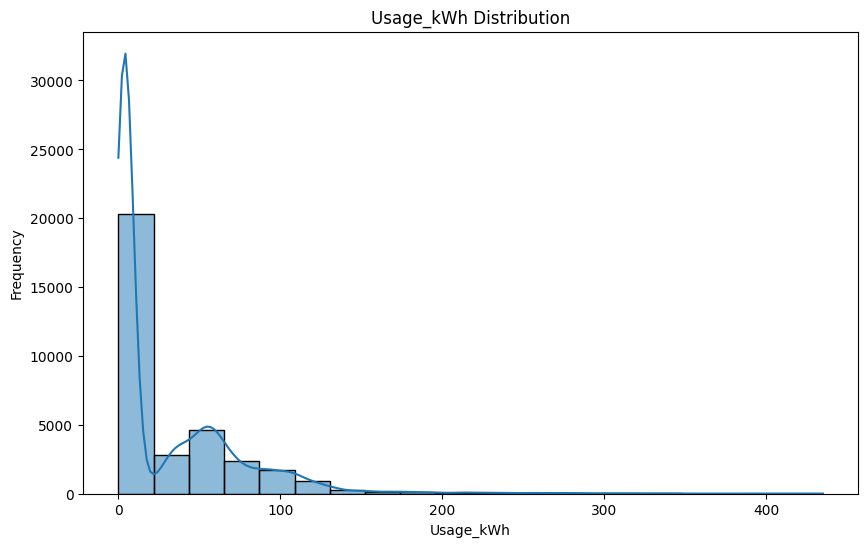

In [8]:
# Data distribution visualization
plt.figure(figsize=(10, 6))
sns.histplot(data['Usage_kWh'], kde=True, bins=20)
plt.title('Usage_kWh Distribution')
plt.xlabel('Usage_kWh')
plt.ylabel('Frequency')
plt.show()

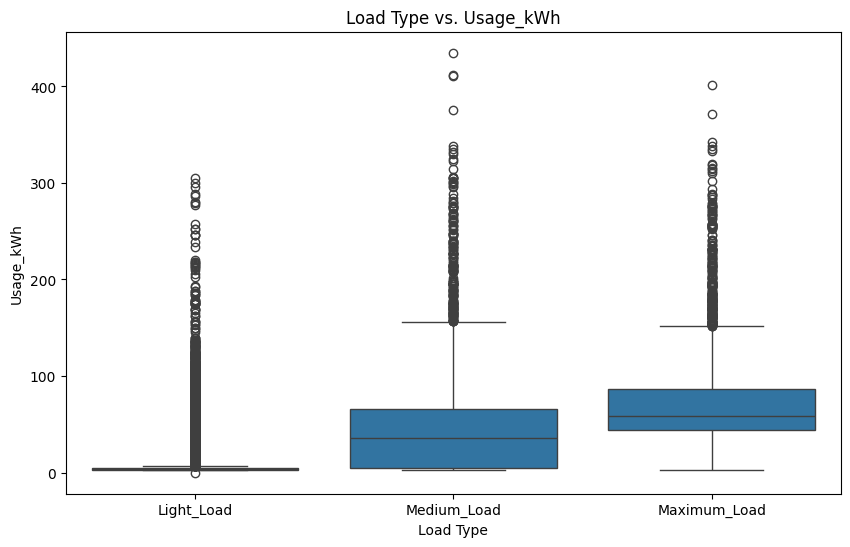

In [9]:
# Relationship between features and target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='Load_Type', y='Usage_kWh', data=data)
plt.title('Load Type vs. Usage_kWh')
plt.xlabel('Load Type')
plt.ylabel('Usage_kWh')
plt.show()

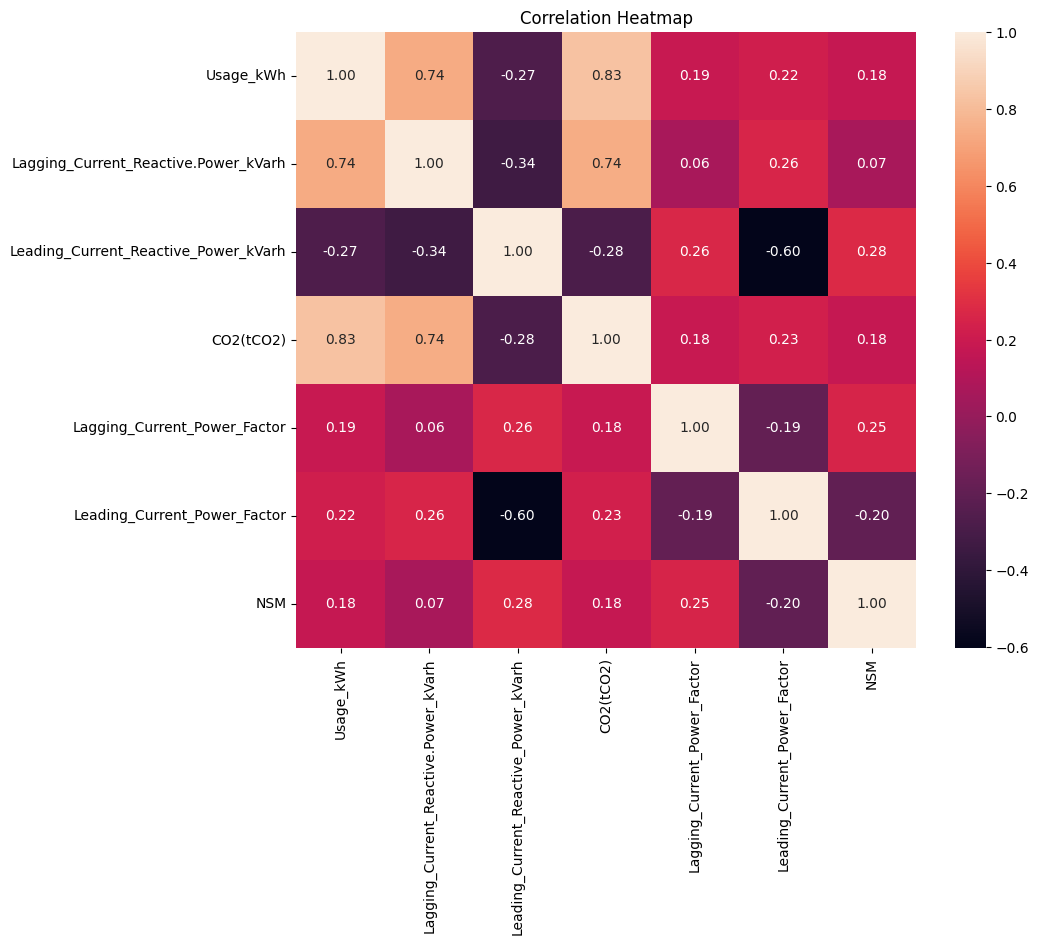

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

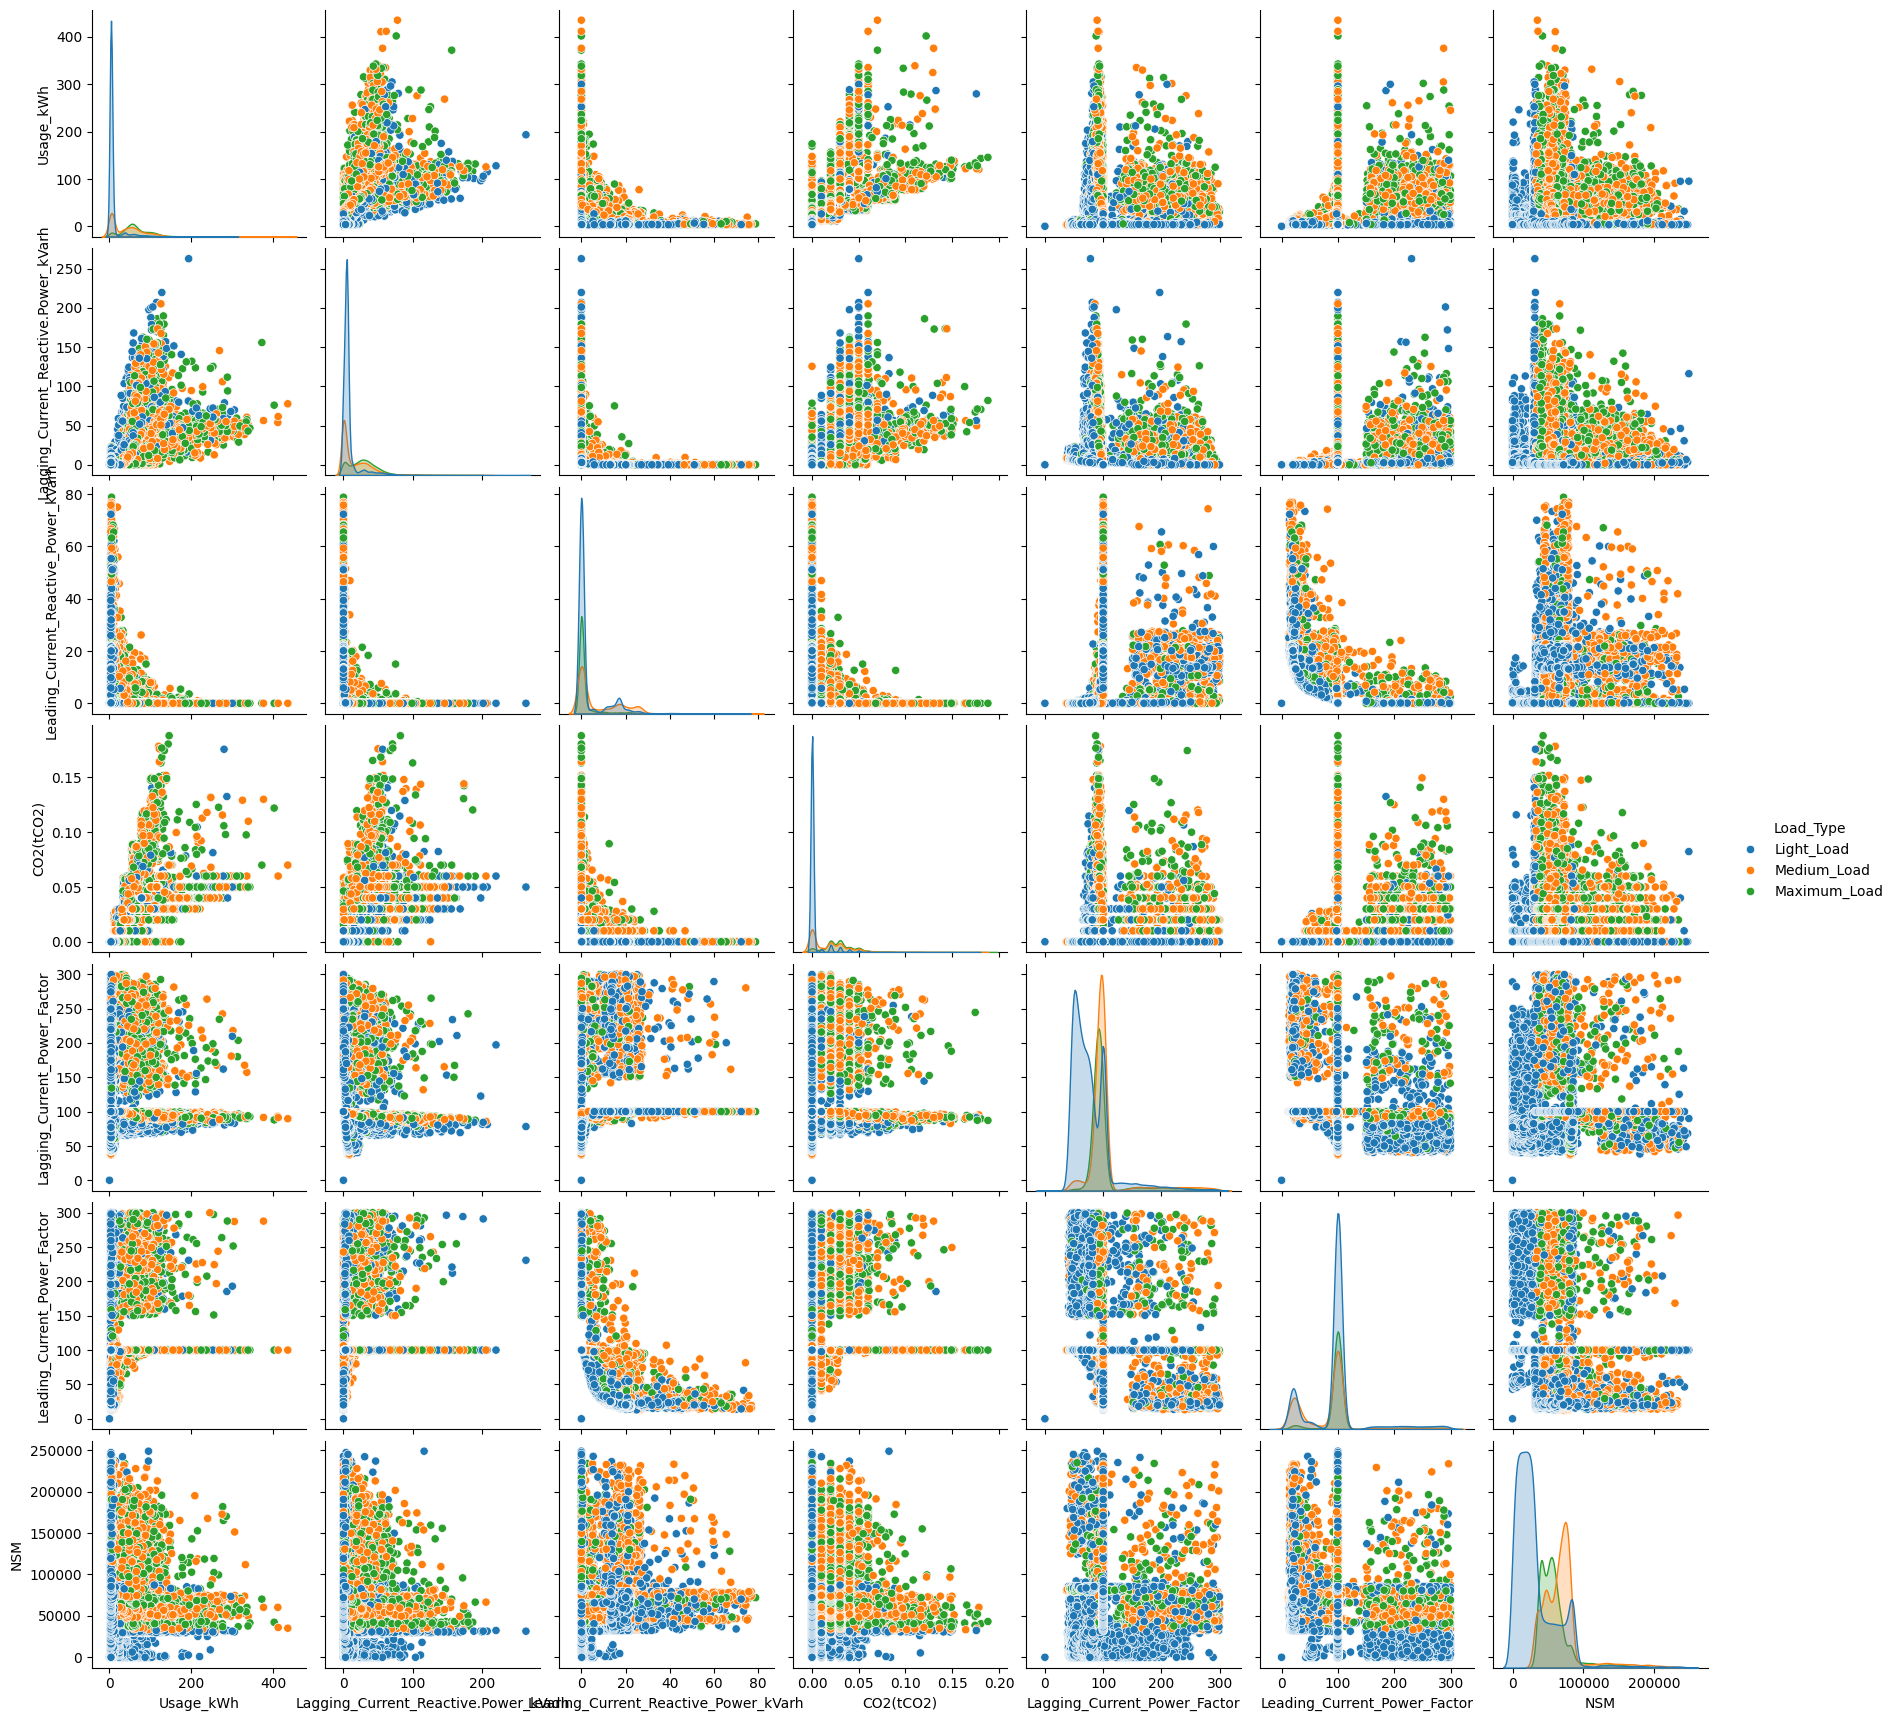

In [11]:
# # Pairplot for numerical features
sns.pairplot(data, hue='Load_Type')
plt.show()

# **Check Missing values**

In [12]:
data.isna().sum()

Date_Time                                  0
Usage_kWh                               1559
Lagging_Current_Reactive.Power_kVarh     876
Leading_Current_Reactive_Power_kVarh    1156
CO2(tCO2)                                455
Lagging_Current_Power_Factor             350
Leading_Current_Power_Factor            1471
NSM                                      455
Load_Type                                  0
dtype: int64

# **Handle the missing values**

In [13]:
from sklearn.impute import SimpleImputer

# Define a SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# List of features with missing values
features_with_missing_values = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
                                'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
                                'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor',
                                'NSM']

# Impute missing values for each feature
for feature in features_with_missing_values:
    data[feature] = imputer.fit_transform(data[[feature]])


In [14]:
data['Date_Time'] = pd.to_datetime(data['Date_Time'])

# Extract useful features from 'Date_Time' column
data['Year'] = data['Date_Time'].dt.year
data['Month'] = data['Date_Time'].dt.month
data['Day'] = data['Date_Time'].dt.day
data['Second'] = data['Date_Time'].dt.second

# Drop the original 'Date_Time' column
data.drop(columns=['Date_Time'], inplace=True)



In [15]:
data.isna().sum()

Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
Load_Type                               0
Year                                    0
Month                                   0
Day                                     0
Second                                  0
dtype: int64

# **Feature Engineering**

In [16]:
data = data[data['Usage_kWh']!=0]

In [17]:
feature_data = data

In [18]:
# Define a function to calculate power factor
def calculate_power_factor(active_power, reactive_power, flag):
    power_factor = math.cos(math.atan(reactive_power / active_power))
    if not flag:
      power_factor = -1 * power_factor

    return power_factor

feature_data['Power_Factor'] = feature_data.apply(lambda x: calculate_power_factor(x['Usage_kWh'], x['Lagging_Current_Reactive.Power_kVarh'], 1)
                                   if x['Lagging_Current_Reactive.Power_kVarh'] > x['Leading_Current_Reactive_Power_kVarh']
                                   else calculate_power_factor(x['Usage_kWh'], x['Leading_Current_Reactive_Power_kVarh'],  0),
                                   axis=1)


In [19]:
# Define a function to calculate power factor
def calculate_kVA(active_power, reactive_power):
    power_factor = math.cos(math.atan(reactive_power / active_power))
    kVA = active_power/power_factor
    return kVA

feature_data['kVAh'] = feature_data.apply(lambda x: calculate_kVA(x['Usage_kWh'], x['Lagging_Current_Reactive.Power_kVarh'])
                                   if x['Lagging_Current_Reactive.Power_kVarh'] > x['Leading_Current_Reactive_Power_kVarh']
                                   else calculate_kVA(x['Usage_kWh'], x['Leading_Current_Reactive_Power_kVarh']),
                                   axis=1)


In [20]:
# Define a function to calculate power factor
def calculate_kW(active_power, NSM):
    kW = (active_power * 3600) / NSM
    return kW

feature_data['kW'] = feature_data.apply(lambda x: calculate_kVA(x['Usage_kWh'], x['NSM']),axis=1)


In [21]:
# Define a function to calculate power factor
def calculate_kW(active_power, NSM):
    kW = (active_power * 3600) / NSM
    return kW

feature_data['kVA'] = feature_data.apply(lambda x: calculate_kVA(x['kVAh'], x['NSM']),axis=1)


In [22]:
feature_data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,Year,Month,Day,Second,Power_Factor,kVAh,kW,kVA
0,8.753692,2.95,0.0,0.0,73.210000,100.000000,900.000000,Light_Load,2018,1,1,0,0.947636,9.237404,900.042570,900.047404
1,4.000000,4.46,0.0,0.0,66.770000,100.000000,1800.000000,Light_Load,2018,1,1,0,0.667673,5.990960,1800.004444,1800.009970
2,3.240000,3.28,0.0,0.0,70.280000,100.000000,8070.880991,Light_Load,2018,1,1,0,0.702755,4.610423,8070.881641,8070.882308
3,3.310000,3.56,0.0,0.0,68.090000,100.000000,3600.000000,Light_Load,2018,1,1,0,0.680924,4.861039,3600.001522,3600.003282
4,3.820000,4.50,0.0,0.0,133.655666,94.926552,4500.000000,Light_Load,2018,1,1,0,0.647157,5.902745,4500.001621,4500.003871


# **Model Selection and Model Evaluation**
### **Logistic Regression**

In [23]:
data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,Year,Month,Day,Second,Power_Factor,kVAh,kW,kVA
0,8.753692,2.95,0.0,0.0,73.210000,100.000000,900.000000,Light_Load,2018,1,1,0,0.947636,9.237404,900.042570,900.047404
1,4.000000,4.46,0.0,0.0,66.770000,100.000000,1800.000000,Light_Load,2018,1,1,0,0.667673,5.990960,1800.004444,1800.009970
2,3.240000,3.28,0.0,0.0,70.280000,100.000000,8070.880991,Light_Load,2018,1,1,0,0.702755,4.610423,8070.881641,8070.882308
3,3.310000,3.56,0.0,0.0,68.090000,100.000000,3600.000000,Light_Load,2018,1,1,0,0.680924,4.861039,3600.001522,3600.003282
4,3.820000,4.50,0.0,0.0,133.655666,94.926552,4500.000000,Light_Load,2018,1,1,0,0.647157,5.902745,4500.001621,4500.003871


In [24]:
# Split the data into features and target variable
y = data["Load_Type"]
X = data.drop(columns=["Load_Type","Power_Factor","kVAh","kW","kVA"])

In [25]:
X.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Year,Month,Day,Second
0,8.753692,2.95,0.0,0.0,73.210000,100.000000,900.000000,2018,1,1,0
1,4.000000,4.46,0.0,0.0,66.770000,100.000000,1800.000000,2018,1,1,0
2,3.240000,3.28,0.0,0.0,70.280000,100.000000,8070.880991,2018,1,1,0
3,3.310000,3.56,0.0,0.0,68.090000,100.000000,3600.000000,2018,1,1,0
4,3.820000,4.50,0.0,0.0,133.655666,94.926552,4500.000000,2018,1,1,0


In [26]:
from sklearn.linear_model import LogisticRegression

# Define the model
model = Pipeline(steps=[('classifier', LogisticRegression())])

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Display class distribution after resampling
print("Class distribution after SMOTE:")
print(pd.Series(y_train).value_counts())

Class distribution after SMOTE:
Medium_Load     14496
Light_Load      14496
Maximum_Load    14496
Name: Load_Type, dtype: int64


In [29]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('classifier', LogisticRegression())])

In [30]:
# Predict on the test set
y_pred = model.predict(X_test)

In [31]:
# print classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Light_Load       0.90      0.78      0.84      3576
Maximum_Load       0.52      0.70      0.60      1500
 Medium_Load       0.51      0.50      0.50      1932

    accuracy                           0.68      7008
   macro avg       0.64      0.66      0.64      7008
weighted avg       0.71      0.68      0.69      7008



## **Random Forest**

In [32]:
# Define the model
model = Pipeline(steps=[('classifier', RandomForestClassifier())])

In [33]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier())])

In [34]:
# Predict on the test set
y_pred = model.predict(X_test)

In [35]:
# print classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Light_Load       0.99      0.96      0.97      3576
Maximum_Load       0.90      0.92      0.91      1500
 Medium_Load       0.90      0.93      0.91      1932

    accuracy                           0.94      7008
   macro avg       0.93      0.94      0.93      7008
weighted avg       0.94      0.94      0.94      7008



## **Decision Tree**

In [36]:
from sklearn.tree import DecisionTreeClassifier
# Define the model
model = Pipeline(steps=[('classifier', DecisionTreeClassifier())])

In [37]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('classifier', DecisionTreeClassifier())])

In [38]:
# Predict on the test set
y_pred = model.predict(X_test)

In [39]:
# print classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Light_Load       0.98      0.96      0.97      3576
Maximum_Load       0.88      0.89      0.88      1500
 Medium_Load       0.87      0.90      0.88      1932

    accuracy                           0.93      7008
   macro avg       0.91      0.91      0.91      7008
weighted avg       0.93      0.93      0.93      7008




## **XGBoost**

In [40]:
from xgboost import XGBClassifier
# Define the model
model = Pipeline(steps=[('classifier', XGBClassifier())])

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
model.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [42]:
# Predict on the test set
y_pred = model.predict(X_test)

In [43]:
y_label = le.transform(y_test)

In [44]:
# print classification report
print(classification_report(y_label,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3576
           1       0.91      0.95      0.93      1500
           2       0.92      0.93      0.93      1932

    accuracy                           0.95      7008
   macro avg       0.94      0.95      0.95      7008
weighted avg       0.96      0.95      0.95      7008



In [45]:
feature_data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,Year,Month,Day,Second,Power_Factor,kVAh,kW,kVA
0,8.753692,2.95,0.0,0.0,73.210000,100.000000,900.000000,Light_Load,2018,1,1,0,0.947636,9.237404,900.042570,900.047404
1,4.000000,4.46,0.0,0.0,66.770000,100.000000,1800.000000,Light_Load,2018,1,1,0,0.667673,5.990960,1800.004444,1800.009970
2,3.240000,3.28,0.0,0.0,70.280000,100.000000,8070.880991,Light_Load,2018,1,1,0,0.702755,4.610423,8070.881641,8070.882308
3,3.310000,3.56,0.0,0.0,68.090000,100.000000,3600.000000,Light_Load,2018,1,1,0,0.680924,4.861039,3600.001522,3600.003282
4,3.820000,4.50,0.0,0.0,133.655666,94.926552,4500.000000,Light_Load,2018,1,1,0,0.647157,5.902745,4500.001621,4500.003871


In [46]:
# Split the data into features and target variable
y = feature_data["Load_Type"]
X = feature_data.drop(columns=["Load_Type"])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Display class distribution after resampling
print("Class distribution after SMOTE:")
print(pd.Series(y_train).value_counts())

Class distribution after SMOTE:
Medium_Load     14496
Light_Load      14496
Maximum_Load    14496
Name: Load_Type, dtype: int64


In [49]:
from xgboost import XGBClassifier
# Define the model
model = Pipeline(steps=[('classifier', XGBClassifier())])
le = LabelEncoder()
y_train = le.fit_transform(y_train)
model.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [50]:
y_pred = model.predict(X_test)
y_label = le.transform(y_test)

In [51]:
print(classification_report(y_label,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3576
           1       0.91      0.95      0.93      1500
           2       0.92      0.93      0.93      1932

    accuracy                           0.95      7008
   macro avg       0.94      0.95      0.94      7008
weighted avg       0.95      0.95      0.95      7008

